In [37]:
import sys
import io

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from pandas.plotting import scatter_matrix

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Read diamond data

In [38]:
file_path = './diamonds-train.csv'

# Total Data 45849 Rows
df = pd.read_csv(file_path)

In [39]:
df.head(10)

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,Ideal,I,VS2,7.53,7.58,4.69,62.1,55.0,10501
1,0.30,Premium,G,SI1,4.39,4.35,2.57,58.8,60.0,574
2,1.37,Ideal,F,VS1,7.28,7.22,4.32,59.6,57.0,11649
3,0.33,Fair,H,VVS2,4.40,4.32,2.84,65.1,59.0,922
4,0.32,Very Good,F,VS2,4.43,4.48,2.62,58.8,62.0,602
5,0.51,Premium,E,SI2,5.15,5.12,3.22,62.7,52.0,1205
6,1.50,Good,H,VS2,7.22,7.27,4.61,63.6,58.0,10291
7,0.85,Ideal,G,VS1,6.09,6.11,3.77,61.8,55.0,4373
8,0.33,Ideal,F,VS1,4.46,4.49,2.74,61.2,56.0,723
9,1.10,Ideal,G,VS1,6.69,6.65,4.09,61.3,54.0,6535


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45849 entries, 0 to 45848
Data columns (total 10 columns):
carat      45849 non-null float64
cut        45849 non-null object
color      45849 non-null object
clarity    45849 non-null object
x          45849 non-null float64
y          45849 non-null float64
z          45849 non-null float64
depth      45849 non-null float64
table      45849 non-null float64
price      45849 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [41]:
df.describe()

,carat,x,y,z,depth,table,price
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797698,5.731171,5.734044,3.537613,61.744716,57.455582,3932.515562
std,0.473863,1.121454,1.140275,0.694809,1.428341,2.237592,3990.380545
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.030000,62.500000,59.000000,5322.000000
max,5.010000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000


In [42]:
# Remove record where x or y or z are equal 0

df = df.drop(df[df.x == 0].index)
df = df.drop(df[df.y == 0].index)
df = df.drop(df[df.z == 0].index)

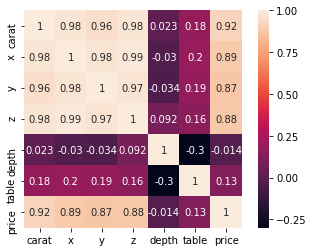

In [43]:
correlation = df.corr()
sns.heatmap(data = correlation, square = True , annot = True, cbar = True)

In [44]:
#scatter_matrix(df, diagonal = 'kde')
#plt.grid()
#plt.show()

In [45]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

#df.cut = df.cut.map(diamond_cut);
#df.clarity = df.clarity.map(diamond_clarity);
#df.color = df.color.map(diamond_color);

Executes One-Hot Encoding on categorical features like cut, color and clarity.

In [46]:
columns = ['cut','color','clarity']

df = pd.get_dummies(df, columns = columns, prefix = columns)

In [47]:
features_df = df.drop(labels=['price', 'depth', 'table'], axis=1)

features_df = features_df
targets_df = df.price

Split data in training set and validation set

In [48]:
training_set_size = 0.8 # (0 to 1)

training_size = round(features_df.shape[0] * training_set_size)

cross_training = features_df.values
cross_targets = targets_df.values 

training_X = features_df.values[:training_size]
validation_X = features_df.values[training_size:]

training_Y = targets_df.values[:training_size]
validation_Y = targets_df.values[training_size:]

Feature Normalization

The Mean Squared Error (MSE) cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.

WARNING:

When using Gradient Descent, you should ensure that all features have a similar scale, or else it will take much longer to converge.

In [49]:
# Min-Max Normalization

cross_minimum = np.min(training, axis = 0)
cross_maximum = np.max(training, axis = 0)

cross_training = (cross_training - cross_minimum) / (cross_maximum - cross_minimum)

minimum = np.min(training_X, axis = 0)
maximum = np.max(training_X, axis = 0)

training_X = (training_X - minimum) / (maximum - minimum)
validation_X = (validation_X - minimum) / (maximum - minimum)

# Mean Normalization - It's possible to change (max - min) in denominator for standard deviation 

#mean = np.mean(training_X, axis = 0)
#minimum = np.min(training_X, axis = 0)
#maximum = np.max(training_X, axis = 0)

#training_X = (training_X - mean) / (maximum - minimum)
#validation_X = (validation_X - mean) / (maximum - minimum)

Best Validation Epoch: [28, 1325527.4996043157]


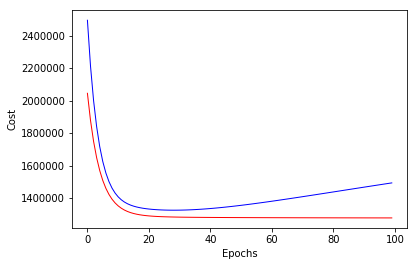

In [50]:
total_epoch = 100

training_epochs = []
validation_epochs = []

regressor = linear_model.SGDRegressor(loss = "squared_loss",
                                      shuffle = False,
                                      max_iter = 1, 
                                      fit_intercept = True,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.01)

select = float('inf')

best_epoch = None
best_model = None

for epoch in range(total_epoch):
    
    regressor.partial_fit(training_X, training_Y)
    
    training_prediction_Y = regressor.predict(training_X)
    training_mse = mean_squared_error(training_Y, training_prediction_Y)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_Y = regressor.predict(validation_X)
    validation_mse = mean_squared_error(validation_Y, validation_prediction_Y)
    
    validation_epochs.append([epoch, validation_mse])
    
    if (validation_mse < select):
        
        select = validation_mse
        best_epoch = [epoch, validation_mse]
        best_model = deepcopy(regressor)
    
print("Best Validation Epoch: " + str(best_epoch))
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [56]:
prediction_Y = best_model.predict(validation_X)

accuracies = cross_val_score(estimator = best_model, X = cross_training, y = cross_targets, cv = 5)

#print('Coefficients: \n', best_model.coef_)
#print('Intercept: \n', best_model.intercept_)
print("Cross Validation Accuracies: ", accuracies)
print("Mean squared error: %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear regression accuracy: ', best_model.score(validation_X, validation_Y))

Cross Validation Accuracies:  [0.89163444 0.89043222 0.89516569 0.89419338 0.91207995]
Mean squared error: 1325527.50
Linear regression accuracy:  0.918002632515262


In [57]:
class SGDRegressor:
    
    def __init__(self, max_iter = 1000, fit_intercept = False, eta0 = 0.01):
        
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.eta0 = eta0
        
        self.coef_ = np.array([]) 
        self.intercept_ = np.array([0])
        
    def fit(self, X, y):
        
        self.intercept_ = np.zeros(1)
        self.coef_ = np.zeros(X.shape[1])
            
        for iteration in range(self.max_iter):
            
            for inputs, target in zip(X, y):

                if (self.fit_intercept):

                    output = np.dot(self.coef_, inputs) + self.intercept_

                    self.intercept_ = self.intercept_ - (self.eta0 * (output - target))
                    self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)

                else:

                    outputs = np.dot(self.coef_, inputs) + self.intercept_

                    self.coef_ = self.coef_ - (self.eta0 * (outputs - targets) * inputs)
    
    
    def partial_fit(self, X, y):
        
        if (not self.intercept_.any()):
            self.intercept_ = np.zeros(1)
        
        if (not self.coef_.any()):
            self.coef_ = np.zeros(X.shape[1])
                
        for inputs, target in zip(X, y):
            
            if (self.fit_intercept):
            
                output = np.dot(self.coef_, inputs) + self.intercept_
                
                self.intercept_ = self.intercept_ - (self.eta0 * (output - target))
                
                self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)
                
            else:
                
                output = np.dot(self.coef_, inputs) + self.intercept_
                
                self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)
    
                
    def predict(self, X):
        
        outputs = np.array([])
        
        for inputs in X:
            
            output = 0
            
            if (self.fit_intercept):
                
                output = np.dot(self.coef_, inputs) + self.intercept_
                
            else:
                
                output = np.dot(self.coef_, inputs)
            
            outputs = np.append(outputs, [output])
        
        return outputs
    
    def score(self, X, y):
        
        predicted_y = self.predict(X)
        
        u = ((y - predicted_y) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - u/v)
    
    def get_params(self, deep = True):
        
        dictionary = {
            'eta0': self.eta0,
            'fit_intercept': self.fit_intercept,
            'max_iter': self.max_iter,
        }
        
        return dictionary

Best Validation Epoch: [28, 1325527.4996043157]


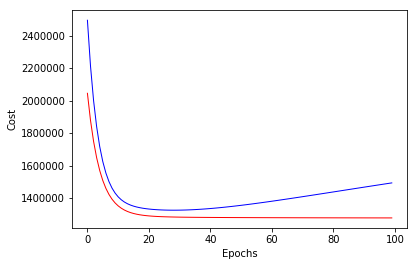

In [58]:
total_epoch = 100

training_epochs = []
validation_epochs = []

regressor = SGDRegressor(max_iter = 1, 
                         fit_intercept = True, 
                         eta0 = 0.01)

select = float('inf')

best_epoch = None
best_model = None

for epoch in range(total_epoch):
    
    regressor.partial_fit(training_X, training_Y)
    
    training_prediction_Y = regressor.predict(training_X)
    training_mse = mean_squared_error(training_Y, training_prediction_Y)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_Y = regressor.predict(validation_X)
    validation_mse = mean_squared_error(validation_Y, validation_prediction_Y)
    
    validation_epochs.append([epoch, validation_mse])
    
    if (validation_mse < select):
        
        select = validation_mse
        best_epoch = [epoch, validation_mse]
        best_model = deepcopy(regressor)
    
print("Best Validation Epoch: " + str(best_epoch))
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [59]:
prediction_Y = best_model.predict(validation_X)

accuracies = cross_val_score(estimator = best_model, X = cross_training, y = cross_targets, cv = 5)

#print('Coefficients: \n', best_model.coef_)
#print('Intercept: \n', best_model.intercept_)
print("Cross Validation Accuracies: ", accuracies)
print("Mean squared error: %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear regression accuracy: ', best_model.score(validation_X, validation_Y))

Cross Validation Accuracies:  [0.89163444 0.89043222 0.89516569 0.89419338 0.91207995]
Mean squared error: 1325527.50
Linear regression accuracy:  0.918002632515262


In [61]:
regressor = linear_model.LinearRegression(fit_intercept = True)

regressor.fit(training_X, training_Y)

prediction_Y = regressor.predict(validation_X)

accuracies = cross_val_score(estimator = regressor, X = cross_training, y = cross_targets, cv = 5)

#print('Coefficients: \n', regressor.coef_)
#print('Intercept: \n', regressor.intercept_)
print("Cross Validation Accuracies: ", accuracies)
print("Mean squared error: %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear regression accuracy: ', regressor.score(validation_X, validation_Y))

Cross Validation Accuracies:  [0.91960485 0.92056477 0.92073439 0.91852463 0.88547353]
Mean squared error: 1856356.59
Linear regression accuracy:  0.885165450403318


In [62]:
class LinearRegression:
    
    def __init__(self, fit_intercept = True):
        
        self.fit_intercept = fit_intercept
        
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        
        X_b = X
        
        if (self.fit_intercept):
            
            X_b = np.insert(X, 0, 1, axis = 1)
            
            # Compute the (Moore-Penrose) pseudo-inverse of a matrix, which grants to compute even if matrix is not invertible
            coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
            self.intercept_ = coefficients[0]
            self.coef_ = coefficients[1:]
            
        else:
            
            # Compute the (Moore-Penrose) pseudo-inverse of a matrix, which grants to compute even if matrix is not invertible
            coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            
            self.intercept_ = 0.0
            self.coef_ = coefficients
            
            
    
    def predict(self, X):
        
        outputs = np.array([])
        
        for inputs in X:
            
            output = 0
            
            output = np.dot(self.coef_, inputs) + self.intercept_
                
            outputs = np.append(outputs, [output])
        
        return outputs
        
    def score(self, X, y):
        
        predicted_y = self.predict(X)
        
        u = ((y - predicted_y) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - u/v)
        
    def get_params(self, deep = True):
        
        dictionary = {
            'fit_intercept': self.fit_intercept
        }
        
        return dictionary

In [63]:
regressor = LinearRegression(fit_intercept = True)

regressor.fit(training_X, training_Y)

prediction_Y = regressor.predict(validation_X)

accuracies = cross_val_score(estimator = regressor, X = cross_training, y = cross_targets, cv = 5)

#print('Coefficients: \n', regressor.coef_)
#print('Intercept: \n', regressor.intercept_)
print("Cross Validation Accuracies: ", accuracies)
print("Mean squared error: %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear regression accuracy: ', regressor.score(validation_X, validation_Y))

Cross Validation Accuracies:  [0.91960485 0.92056477 0.92073439 0.91852463 0.88547353]
Mean squared error: 1851376.37
Linear regression accuracy:  0.8854735274214901
